# Import Notebook Packages

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function

## $$ f(x) = x ^ 2 + x +1$$

In [9]:
def f(x):
    return x**2 + x + 1 

In [11]:
# Make data
x_1 = np.linspace(start=-3, stop=3, num=500)

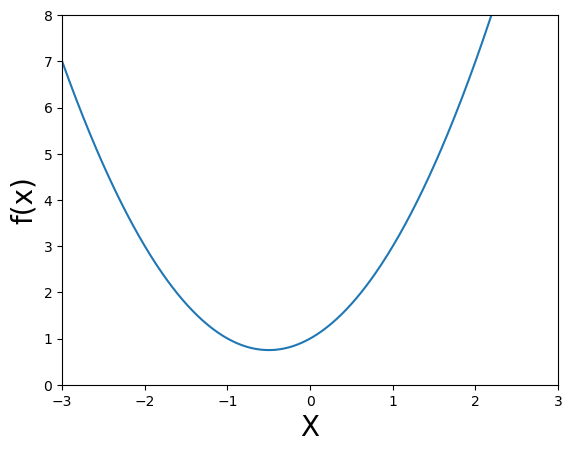

In [18]:
# make plot of f(x)
plt.plot(x_1, f(x_1))
plt.xlim(left=-3, right=3)
plt.ylim(bottom=0, top=8)
plt.ylabel('f(x)', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.show()

## Slope and Derivatives

In [19]:
def df(x):
    return 2 * x + 1 

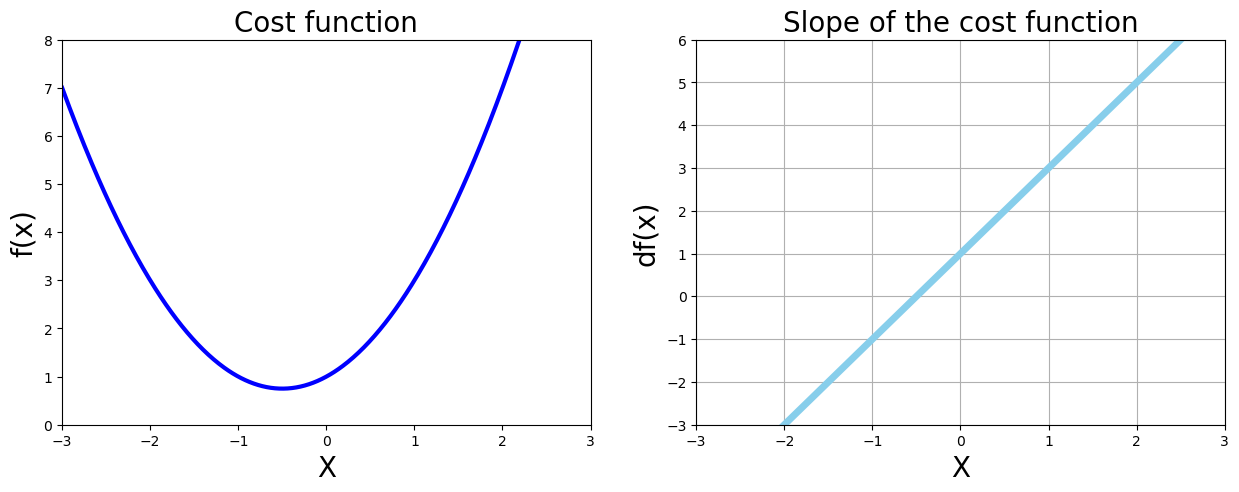

In [69]:
# make plot of f(x) and df(x) side by side

plt.figure(figsize= (15, 5))

# chart#1: plot f(x)
plt.subplot(1, 2, 1)
plt.title('Cost function', fontsize = 20)
plt.xlim(left=-3, right=3)
plt.ylim(bottom=0, top=8)
plt.ylabel('f(x)', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.plot(x_1, f(x_1), color='blue', lw=3)

# chart#2 plot df(x)
plt.subplot(1, 2, 2)
plt.title('Slope of the cost function', fontsize = 20)
plt.xlim(left=-3, right=3)
plt.ylim(bottom=-3, top=6)
plt.ylabel('df(x)', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.grid()
plt.plot(x_1, df(x_1), color='skyblue', lw=5)

plt.show()

## Gradient Descent

In [53]:
# Gradient Descent

new_x = 3

x_list = [new_x]
slope_list = [df(new_x)]
step_multiplier = 0.1
precision = 0.00001
max_iteration = 500

for n in range(max_iteration):
    gradient = df(new_x)
    new_x -= gradient * step_multiplier    
    x_list.append(new_x)
    slope_list.append(gradient)
    
    if abs(x_list[len(x_list)-1] - x_list[len(x_list)-2]) < precision:
        print('Loop runs this time:', n)
        break
        
print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))   


Loop runs this time: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


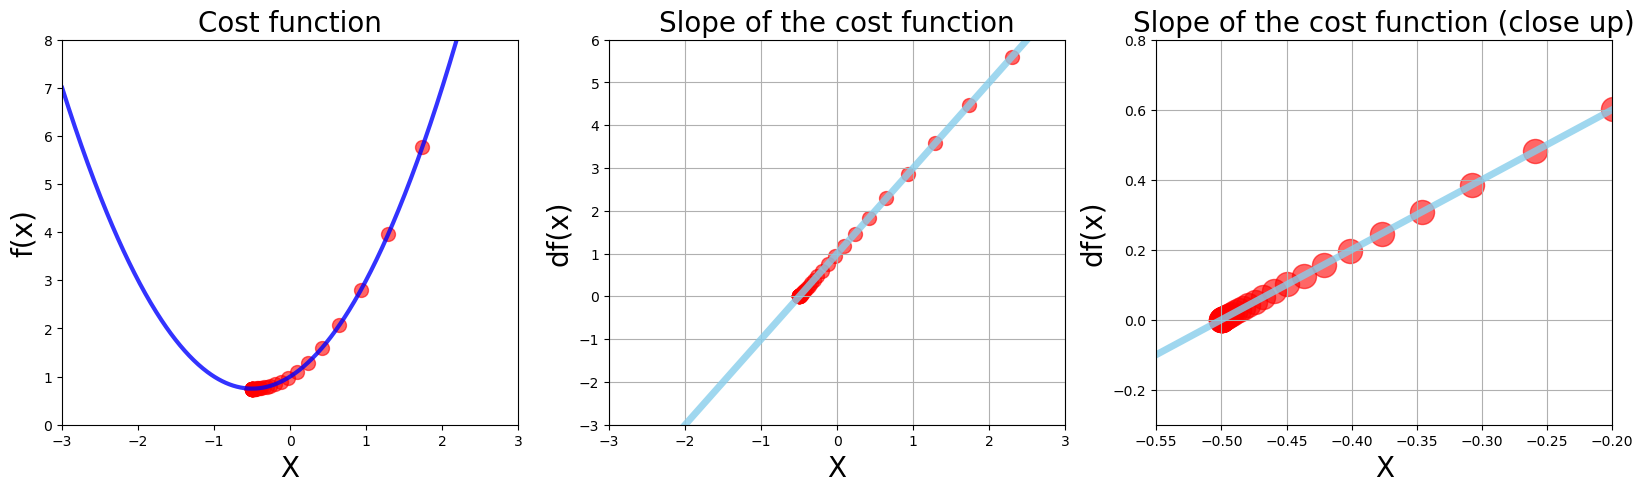

In [65]:
# make plot of f(x) and derivative side by side

plt.figure(figsize= (20, 5))

# chart#1: plot f(x)
plt.subplot(1, 3, 1)
plt.title('Cost function', fontsize = 20)
plt.xlim(left=-3, right=3)
plt.ylim(bottom=0, top=8)
plt.ylabel('f(x)', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.plot(x_1, f(x_1), color='blue', lw=3, alpha=0.8)
x_array = np.array(x_list)
plt.scatter(x=x_list, y=f(x_array), s=100, color='red', alpha=0.6)

# chart#2 plot df(x)
plt.subplot(1, 3, 2)
plt.title('Slope of the cost function', fontsize = 20)
plt.xlim(left=-3, right=3)
plt.ylim(bottom=-3, top=6)
plt.ylabel('df(x)', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.grid()
plt.plot(x_1, df(x_1), color='skyblue', lw=5, alpha=0.8)
plt.scatter(x=x_list, y=df(x_array), s=100, color='red', alpha=0.6)

# chart#3 plot df(x) (close up)
plt.subplot(1, 3, 3)
plt.title('Slope of the cost function (close up)', fontsize = 20)
plt.xlim(left=-0.55, right=-0.2) 
plt.ylim(bottom=-0.3, top=0.8)
plt.ylabel('df(x)', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.grid()
plt.plot(x_1, df(x_1), color='skyblue', lw=5, alpha= 0.8)
plt.scatter(x=x_list, y=df(x_array), s=300, color='red', alpha=0.6)


plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$ g(x) = x^4 - 4x^2 + 5 $$

In [105]:
# make some data
x_2 = np.linspace(start=-2, stop=2, num=1000)

# make f function
def g(x):
    return x**4 - 4 * x**2 + 5

# make df function
def dg(x):
    return 4 * x**3 - 8 * x

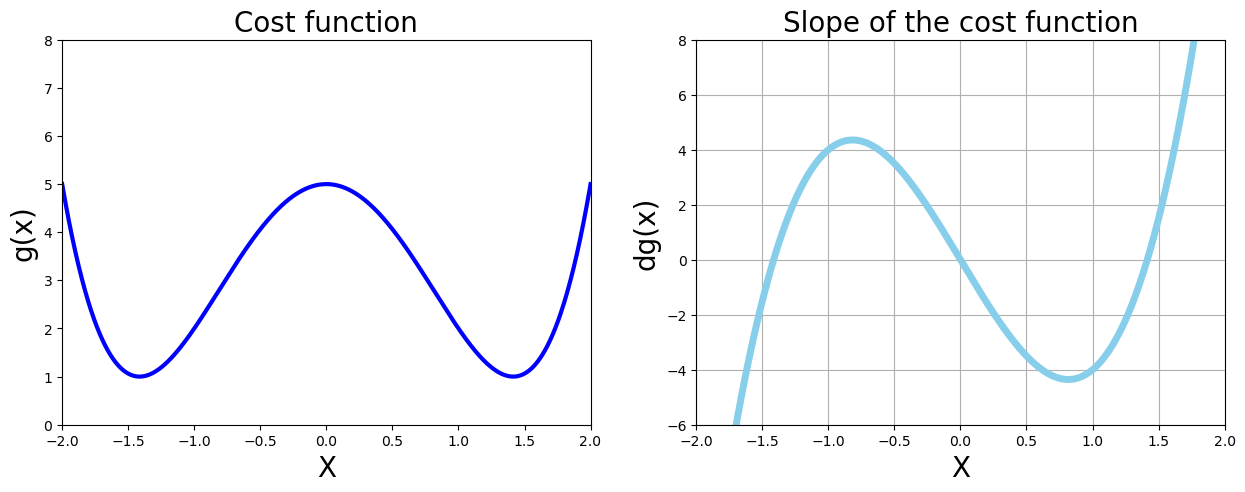

In [70]:
# make plot of g(x) and dg(x) side by side

plt.figure(figsize= (15, 5))

# chart#1: plot g(x)
plt.subplot(1, 2, 1)
plt.title('Cost function', fontsize = 20)
plt.xlim(left=-2, right=2)
plt.ylim(bottom=0, top=8)
plt.ylabel('g(x)', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.plot(x_2, g(x_2), color='blue', lw=3)

# chart#2 plot dg(x)
plt.subplot(1, 2, 2)
plt.title('Slope of the cost function', fontsize = 20)
plt.xlim(left=-2, right=2)
plt.ylim(bottom=-6, top=8)
plt.ylabel('dg(x)', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.grid()
plt.plot(x_2, dg(x_2), color='skyblue', lw=5)

plt.show()

## Gradient Descent as a Python Function

In [97]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, 
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        gradient = derivative_func(new_x)
        new_x -= gradient * multiplier    
        x_list.append(new_x)
        slope_list.append(gradient)

        if abs(x_list[len(x_list)-1] - x_list[len(x_list)-2]) < precision:            
            break
    return new_x, x_list, slope_list

In [98]:
local_min, list_x, deriv_x = gradient_descent(derivative_func=dg, initial_guess= -0.5,
                                               multiplier=0.01, precision=0.0001)

print('local min at: ', local_min)
print('Number of steps: ', len(x_list))

local min at:  -1.4137636556157256
Number of steps:  52


In [99]:
local_min, list_x, deriv_x = gradient_descent(derivative_func=dg, initial_guess= -0.1)                                              

print('local min at: ', local_min)
print('Number of steps: ', len(x_list))

local min at:  -1.4120887490901561
Number of steps:  52


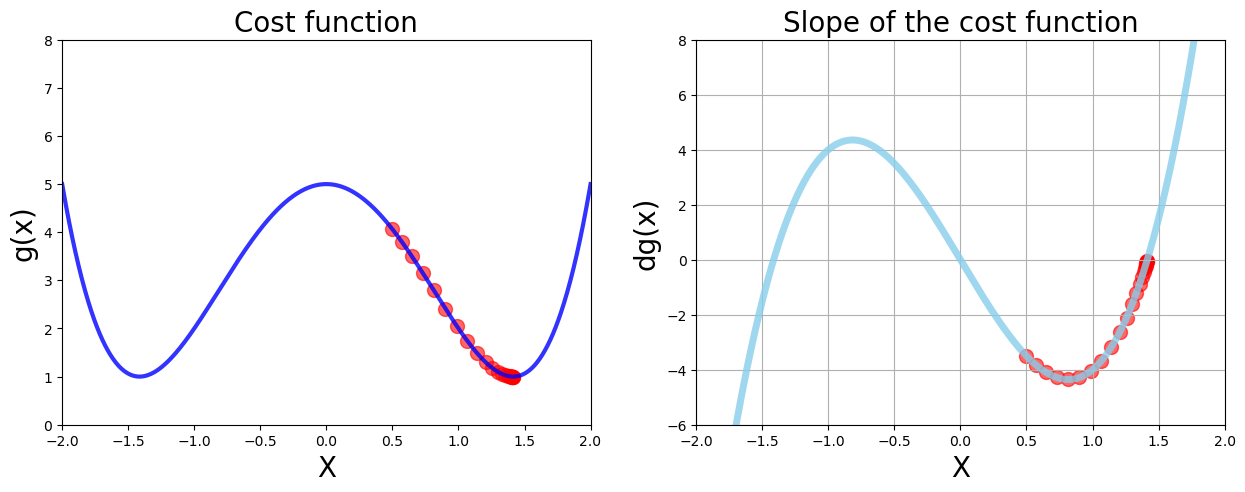

In [104]:
# make plot of g(x) and dg(x) side by side
local_min, list_x, deriv_x = gradient_descent(derivative_func=dg, initial_guess= 0.5 )


plt.figure(figsize= (15, 5))

# chart#1: plot g(x), cost function
plt.subplot(1, 2, 1)
plt.title('Cost function', fontsize = 20)
plt.xlim(left=-2, right=2)
plt.ylim(bottom=0, top=8)
plt.ylabel('g(x)', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.plot(x_2, g(x_2), color='blue', lw=3, alpha=0.8)
array_x = np.array(list_x)
plt.scatter(x=list_x, y=g(array_x), s=100, color='red', alpha=0.6)

# chart#2 plot dg(x), chart derivative
plt.subplot(1, 2, 2)
plt.title('Slope of the cost function', fontsize = 20)
plt.xlim(left=-2, right=2)
plt.ylim(bottom=-6, top=8)
plt.ylabel('dg(x)', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.grid()
plt.plot(x_2, dg(x_2), color='skyblue', lw=5, alpha= 0.8)
plt.scatter(x=list_x, y=dg(array_x), s=100, color='red', alpha=0.6)

plt.show()

# Example 3 - Divergence, Overflow and Python Tuples

## $$ h(x) = x^5 - 2x^4 + 2 $$

In [106]:
#  make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

# make cost function
def h(x):
    return x**5 - 2 * x**4 + 2

# make derivative function (slope function)
def dh(x):
    return 5 * x**4 - 8 * x**3

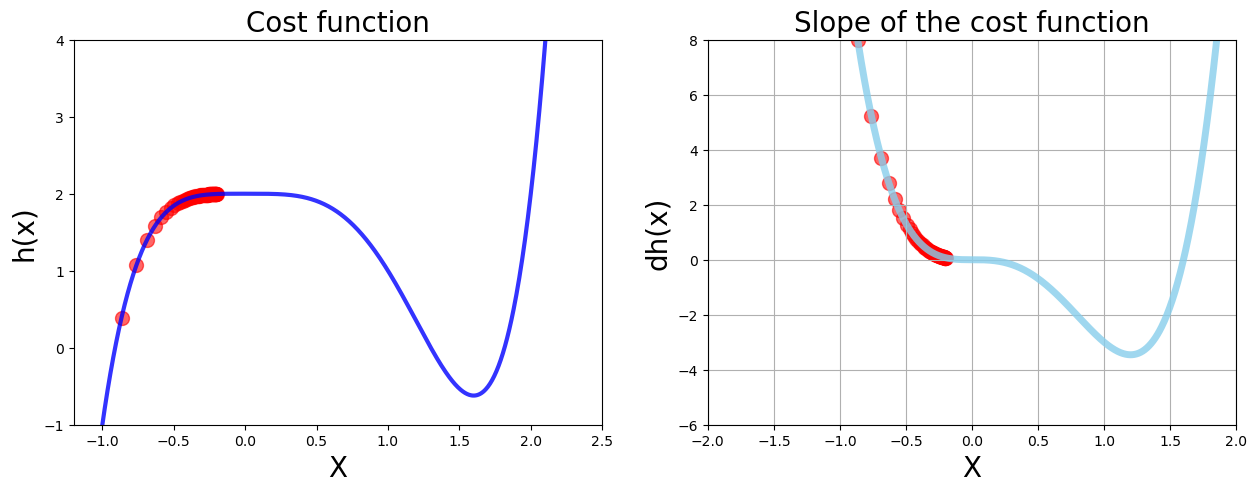

Local min occurs at:  -1.8398461123332792e+24
Cost at this minimum is:  -2.1081790694225687e+121
Number of steps:  72


In [110]:
# make plot of h(x) and dh(x) side by side
local_min, list_x, deriv_x = gradient_descent(derivative_func=dh, initial_guess= -0.2, 
                                              max_iter=71)


plt.figure(figsize= (15, 5))

# chart#1: plot g(x), cost function
plt.subplot(1, 2, 1)
plt.title('Cost function', fontsize = 20)
plt.xlim(left=-1.2, right=2.5)
plt.ylim(bottom=-1, top=4)
plt.ylabel('h(x)', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.plot(x_3, h(x_3), color='blue', lw=3, alpha=0.8)
array_x = np.array(list_x)
plt.scatter(x=list_x, y=h(array_x), s=100, color='red', alpha=0.6)

# chart#2 plot dg(x), chart derivative
plt.subplot(1, 2, 2)
plt.title('Slope of the cost function', fontsize = 20)
plt.xlim(left=-2, right=2)
plt.ylim(bottom=-6, top=8)
plt.ylabel('dh(x)', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.grid()
plt.plot(x_2, dh(x_2), color='skyblue', lw=5, alpha= 0.8)
plt.scatter(x=list_x, y=dh(array_x), s=100, color='red', alpha=0.6)

plt.show()

print('Local min occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))

In [115]:
data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min is', data_tuple[0])
print('Cost at the last x value is', h(data_tuple[0]))
print('Number of steps is', len(data_tuple[1]))

Local min is 1.5989534547394717
Cost at the last x value is -0.6214287992331258
Number of steps is 117


## Learning Rates

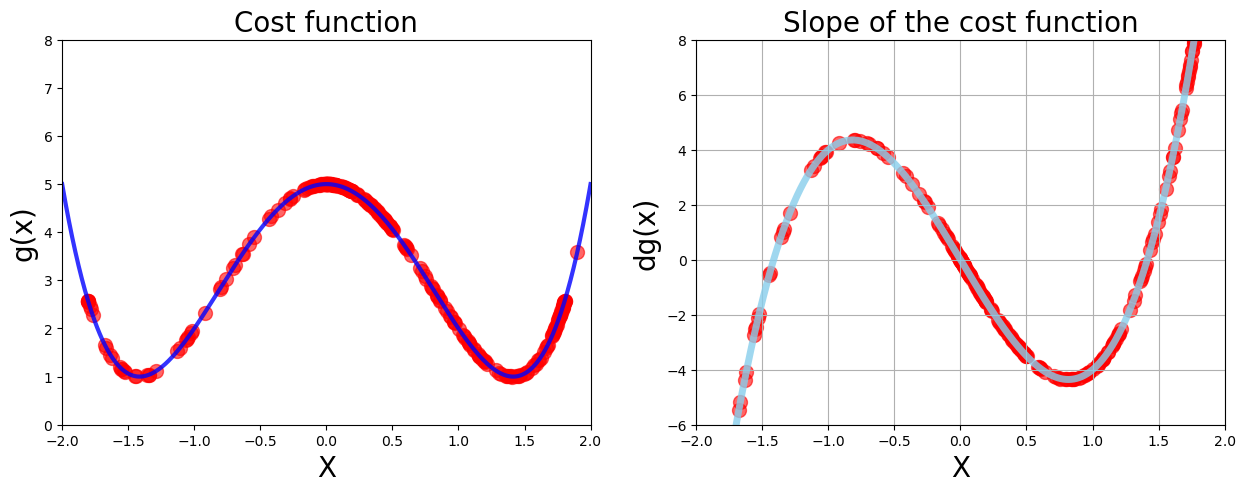

Number of steps:  254


In [118]:
# make plot of g(x) and dg(x) side by side
local_min, list_x, deriv_x = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                             multiplier=0.2, max_iter=500)


plt.figure(figsize= (15, 5))

# chart#1: plot g(x), cost function
plt.subplot(1, 2, 1)
plt.title('Cost function', fontsize = 20)
plt.xlim(left=-2, right=2)
plt.ylim(bottom=0, top=8)
plt.ylabel('g(x)', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.plot(x_2, g(x_2), color='blue', lw=3, alpha=0.8)
array_x = np.array(list_x)
plt.scatter(x=list_x, y=g(array_x), s=100, color='red', alpha=0.6)

# chart#2 plot dg(x), chart derivative
plt.subplot(1, 2, 2)
plt.title('Slope of the cost function', fontsize = 20)
plt.xlim(left=-2, right=2)
plt.ylim(bottom=-6, top=8)
plt.ylabel('dg(x)', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.grid()
plt.plot(x_2, dg(x_2), color='skyblue', lw=5, alpha= 0.8)
plt.scatter(x=list_x, y=dg(array_x), s=100, color='red', alpha=0.6)

plt.show()

print('Number of steps: ', len(list_x))

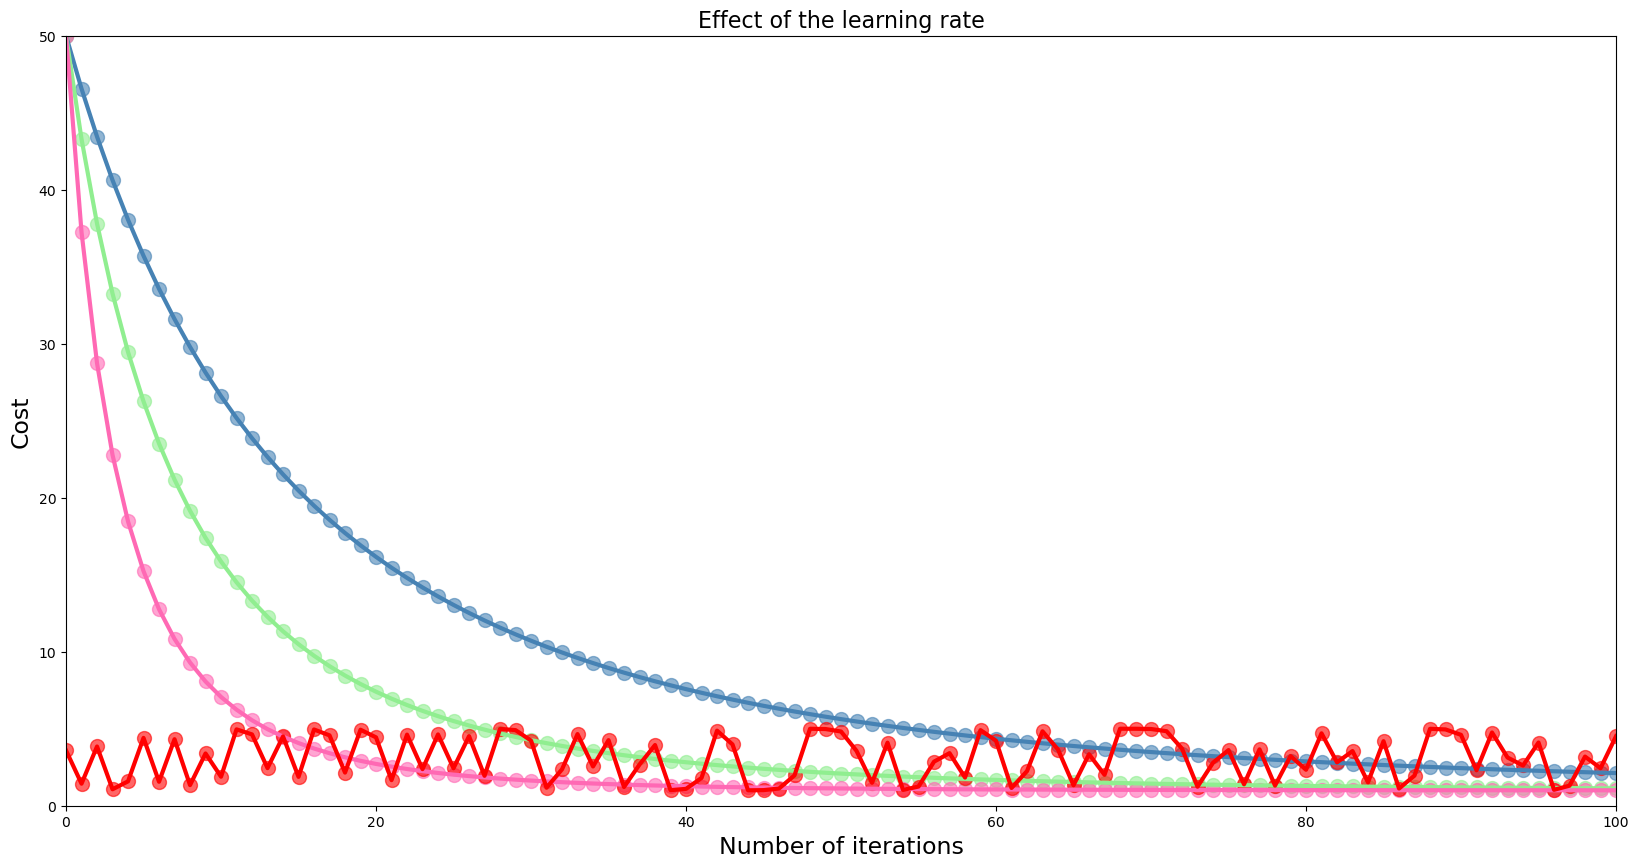

In [133]:
# Run gradient descent 3 times

n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.0005, precision=0.0001, max_iter=n)

medium_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.001, precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.002, precision=0.0001, max_iter=n)

insane_gamma = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.25, precision=0.0001, max_iter=n)

iterative_number = range(0, n+1)


plt.figure(figsize=(20, 10))
plt.title('Effect of the learning rate', fontsize=16)
plt.xlabel('Number of iterations', fontsize=17)
plt.ylabel('Cost', fontsize=17)
plt.xlim(left=0, right=n)
plt.ylim(bottom=0, top=50)


plt.plot(iterative_number, g(np.array(low_gamma[1])), color='steelblue', lw=3,)
plt.scatter(x=iterative_number, y=g(array_x), s=100, color='steelblue', alpha=0.6)


plt.plot(iterative_number, g(np.array(medium_gamma[1])), color='lightgreen', lw=3,)
plt.scatter(x=iterative_number, y=g(np.array(medium_gamma[1])), s=100, color='lightgreen', alpha=0.6)

plt.plot(iterative_number, g(np.array(high_gamma[1])), color='hotpink', lw=3,)
plt.scatter(x=iterative_number, y=g(np.array(high_gamma[1])), s=100, color='hotpink', alpha=0.6)

plt.plot(iterative_number, g(np.array(insane_gamma[1])), color='red', lw=3,)
plt.scatter(x=iterative_number, y=g(np.array(insane_gamma[1])), s=100, color='red', alpha=0.6)


plt.show()

# Example 4 - Data Visualization (3D)

## $$ f(x,y) = \frac{1}{3^{(-x^2-y^2)} + 1} $$

In [140]:
# define f function
def f(x, y):
    return 1/(3**(-x**2 - y**2)+1)

In [144]:
# make data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid', x_4.shape)


Shape of X array (200,)
Array after meshgrid (200, 200)


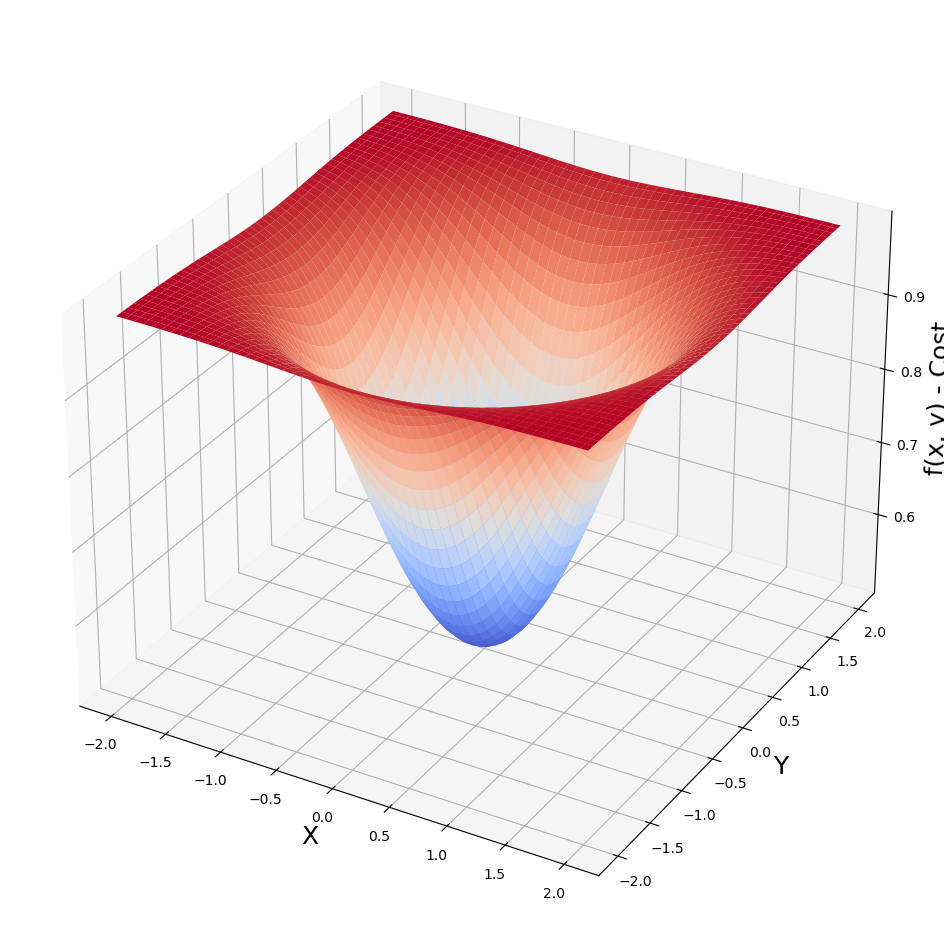

In [158]:
# Generate 3D plot

fig = plt.figure(figsize = (16,12))
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X', fontsize=18)
ax.set_ylabel('Y',fontsize=18)
ax.set_zlabel('f(x, y) - Cost', fontsize=18)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, linewidth=0)
plt.show()


## Partial derivatives 

## $$ \frac{\partial f}{\partial x} = \frac{2xln(3) \cdot 3^{-x^2-y^2}}{\big(3^{-x^2-y^2} + 1\big)^2} $$
## $$ \frac{\partial f}{\partial y} = \frac{2yln(3) \cdot 3^{-x^2-y^2}}{\big(3^{-x^2-y^2} + 1\big)^2} $$

In [169]:
a, b =symbols('x,y')
print('the cost function is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b),a))
print('Value of f(x,y) at x=1.8 y=1.0 is: ', 
      f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
print('Value of partial derivative wrt x: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

the cost function is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is:  0.990604794032582
Value of partial derivative wrt x:  0.0368089716197505


## Batch Gradient Descent with SymPy

In [174]:
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])

for n in range(max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


In [176]:
# partial derivative function
def fpx(x, y):
    r = 3**(-x**2-y**2)
    return (2*x*log(3)* r)/(r + 1)**2

def fpy(x, y):
    r = 3**(-x**2-y**2)
    return (2*y*log(3)* r)/(r + 1)**2   


In [177]:
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])

for n in range(max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


## Graphing 3D Gradient Descent & Adv Numpy Arrays

In [182]:
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])
print(params.shape)
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array= np.append(values_array, params.reshape(1,2), axis=0)
#     values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)
    

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(2,)
(1, 2)
Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


In [186]:
values_array[1:10, 1]


array([0.997955057132236, 0.995875835739887, 0.993761278861555,
       0.991610282627618, 0.989421693562458, 0.987194305697374,
       0.984926857478604, 0.982618028453464, 0.980266435715951],
      dtype=object)

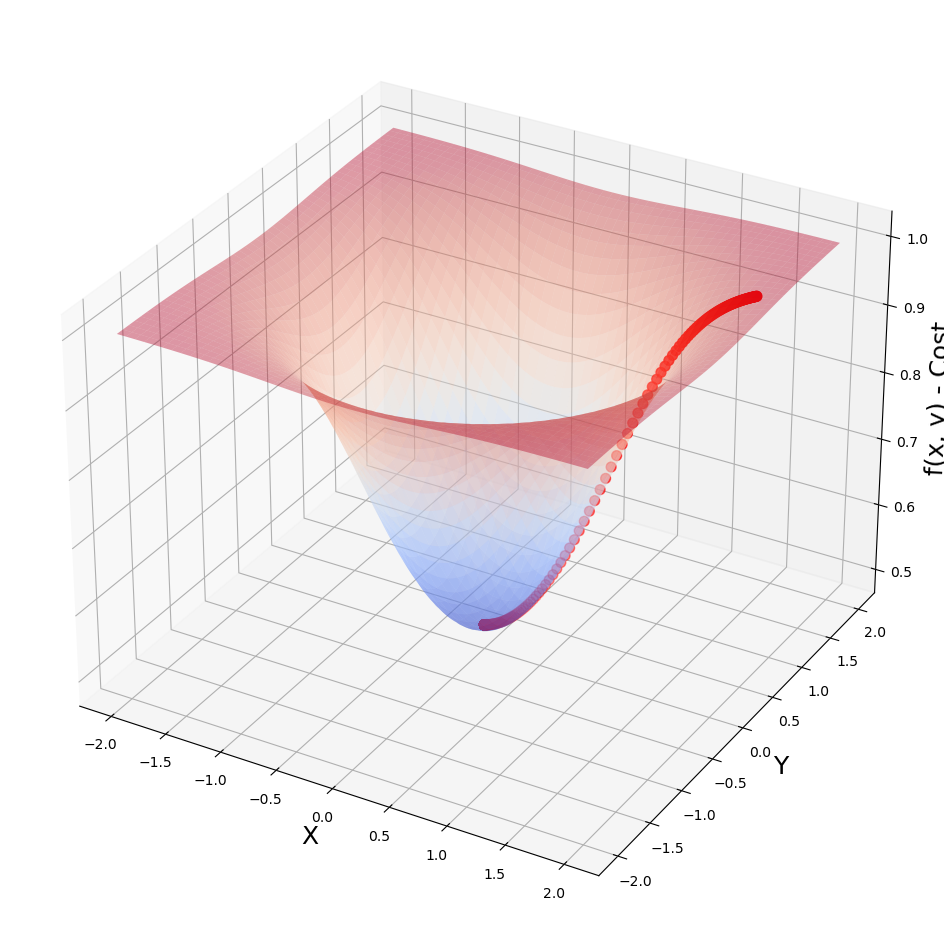

In [190]:
# Generate 3D plot

fig = plt.figure(figsize = (16,12))
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X', fontsize=18)
ax.set_ylabel('Y',fontsize=18)
ax.set_zlabel('f(x, y) - Cost', fontsize=18)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha = 0.4)
ax.scatter(values_array[:,0], values_array[:,1], f(values_array[:,0], values_array[:,1]), color='red', s=50)
plt.show()


In [191]:
kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']])
print(hs_band.shape)

print('hs_band[0]  :', hs_band[0])
print('hs_band[0][1]   :', hs_band[0][1])

the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)

print('Printing nicknames...', the_roots[:, 0])

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print('Printing band roles ...', the_roots[:, 1])

(1, 2)
(2, 2)
hs_band[0]  : ['Black Thought' 'MC']
hs_band[0][1]   : MC
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames... ['Black Thought' 'Questlove' 'Captain']
Printing band roles ... ['MC' 'Drums' 'Guitar' 'MC']


# Example 5 - Working with Data & a Real Cost Function

## Mean square error: a cost function for regression problem

## $$ RSS = \sum_{i=1}^n \big( y^{(i)} - h_{\theta}x^{(i)}\big)^2 $$
## $$ MSE =\frac{1}{n} \sum_{i=1}^n \big( y^{(i)} - h_{\theta}x^{(i)}\big)^2 $$
## $$ MSE =\frac{1}{n} \sum_{i=1}^n \big( y - \hat{y} \big)^2 $$

In [193]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [223]:
reg = LinearRegression()
reg.fit(x_5, y_5)

print('Theta 0: ', reg.intercept_[0])
print('Theta 1: ', reg.coef_[0][0])
print('Theta 1: ', reg.coef_[0])
print('Theta 1: ', reg.coef_)

Theta 0:  0.8475351486029536
Theta 1:  1.2227264637835915
Theta 1:  [1.22272646]
Theta 1:  [[1.22272646]]


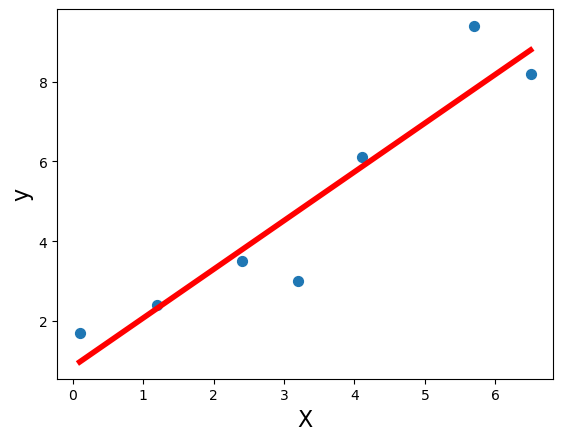

In [224]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, reg.predict(x_5), color='red', lw=4)
plt.xlabel("X", fontsize = 16)
plt.ylabel("y", fontsize = 16)

plt.show()

In [225]:
y_hat = 0.8475351486029536 + 1.2227264637835915 * x_5

print("the predicted values are: \n", y_hat)

print('the actual values are: \n', y_5)

the predicted values are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
the actual values are: 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [226]:
# write mse function

def mse(y, y_hat):
    return (1/y.size) * sum((y - y_hat)**2)

In [228]:
print('mse from mse fuunction: ', mse(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, reg.predict(x_5)))

mse from mse fuunction:  [0.94796558]
MSE regression is 0.9479655759794577


## 3D Plot for the MSE Cost Function

In [233]:
# make data
nr_theta = 200
theta_0 = np.linspace(start=-1, stop=3, num=nr_theta)
theta_1 = np.linspace(start=-1, stop=3, num=nr_theta)

plot_t0, plot_t1 = np.meshgrid(theta_0, theta_1)


In [234]:
# calc mse for all thethas

plot_cost = np.zeros((nr_theta, nr_theta))

for i in range (nr_theta):
    for j in range(nr_theta):
        y_hat = plot_t0[i][j] + plot_t1[i][j] * x_5
        plot_cost[i][j] = mse(y_5, y_hat)
                     
print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


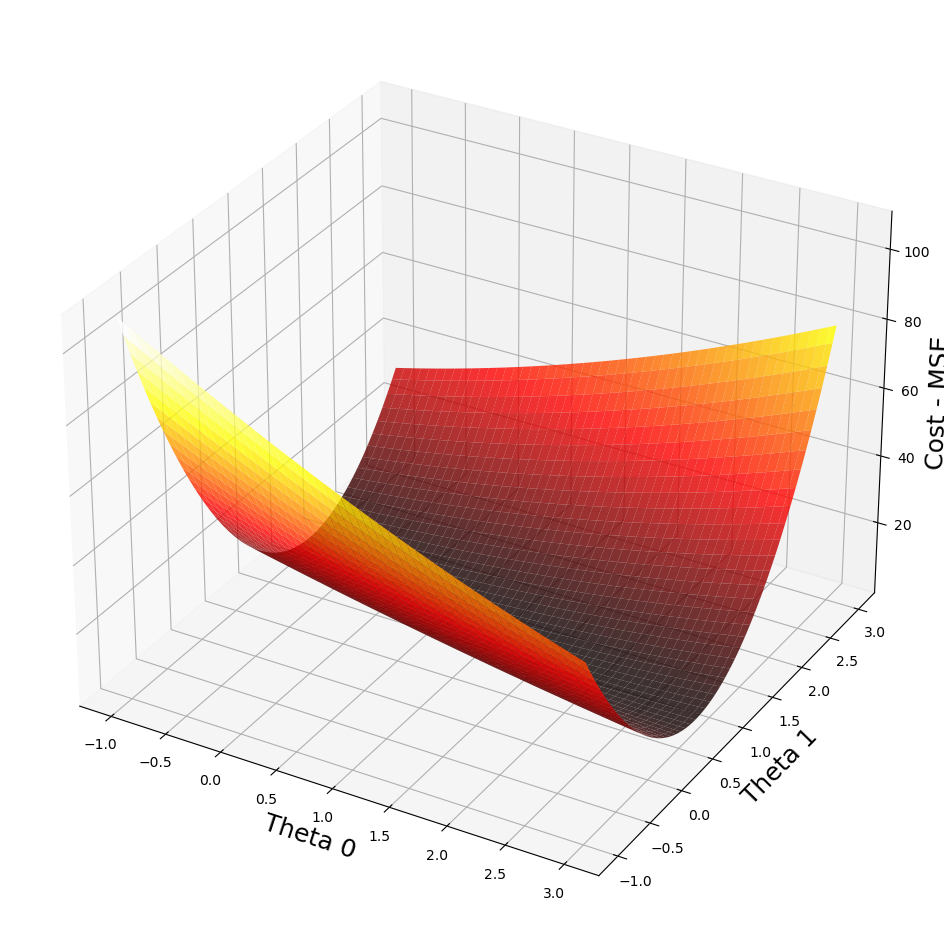

In [239]:
# Plot MSE

fig = plt.figure(figsize = (16,12))
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('Theta 0', fontsize=18)
ax.set_ylabel('Theta 1',fontsize=18)
ax.set_zlabel('Cost - MSE ', fontsize=18)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot, alpha = 0.8)

plt.show()

In [247]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('the value of theta 0 at min MSE is: ', plot_t0[ij_min[0]][ij_min[1]])
print('the value of theta 1 at min MSE is: ', plot_t1[ij_min[0]][ij_min[1]])

Min value of plot_cost 0.9483826526747163
Min occurs at (i,j): (111, 91)
the value of theta 0 at min MSE is:  0.829145728643216
the value of theta 1 at min MSE is:  1.2311557788944723


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

## MSE & Gradient Descent

In [250]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size
    
    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
    
    return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    #return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [255]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))
    
# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


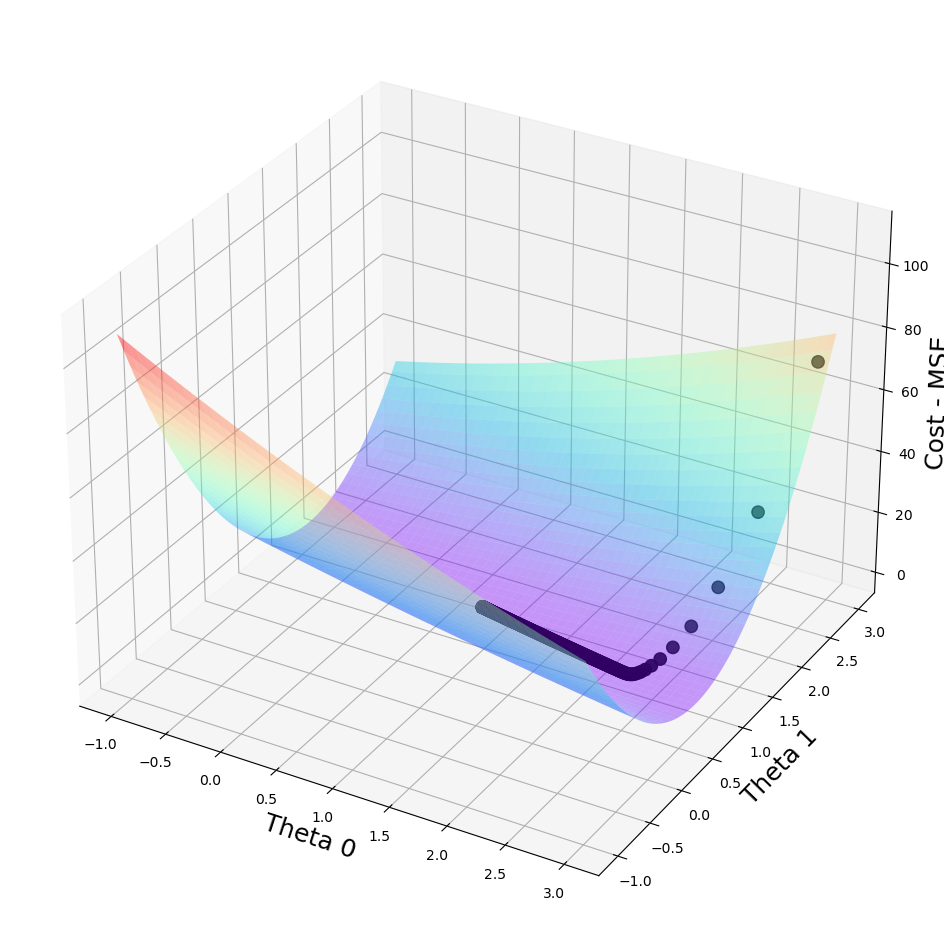

In [256]:
# Plotting MSE
fig = plt.figure(figsize = (16,12))
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('Theta 0', fontsize=18)
ax.set_ylabel('Theta 1',fontsize=18)
ax.set_zlabel('Cost - MSE ', fontsize=18)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha = 0.4)
ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')

plt.show()